In [ ]:
!pip install "jax[tpu]"
!pip install keras-cv
!pip install keras-hub
!pip install keras

In [2]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import ops
import keras
print(keras.__version__)
print(keras.backend.backend())

3.13.1
jax


In [ ]:
inputs = keras.Input(shape=(784,))  # Input layer shape for flatened MNIST images
x = layers.Dense(64, activation="relu")(inputs)  # First hidden layer
x = layers.Dense(64, activation="relu")(x)  # Second hidden layer
outputs = layers.Dense(10)(x)  # Output layer
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()


Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

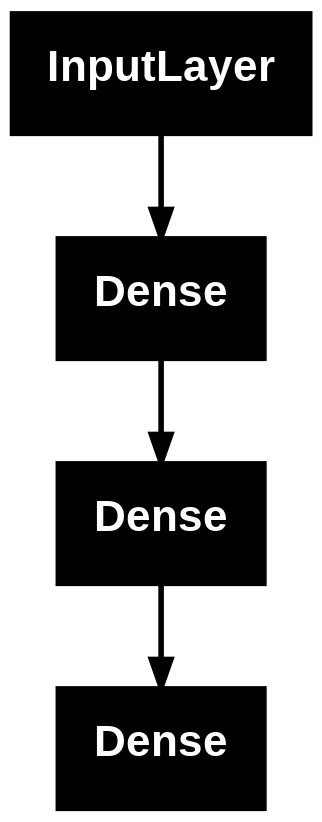

In [4]:
keras.utils.plot_model(model, "feedforward_model.png")

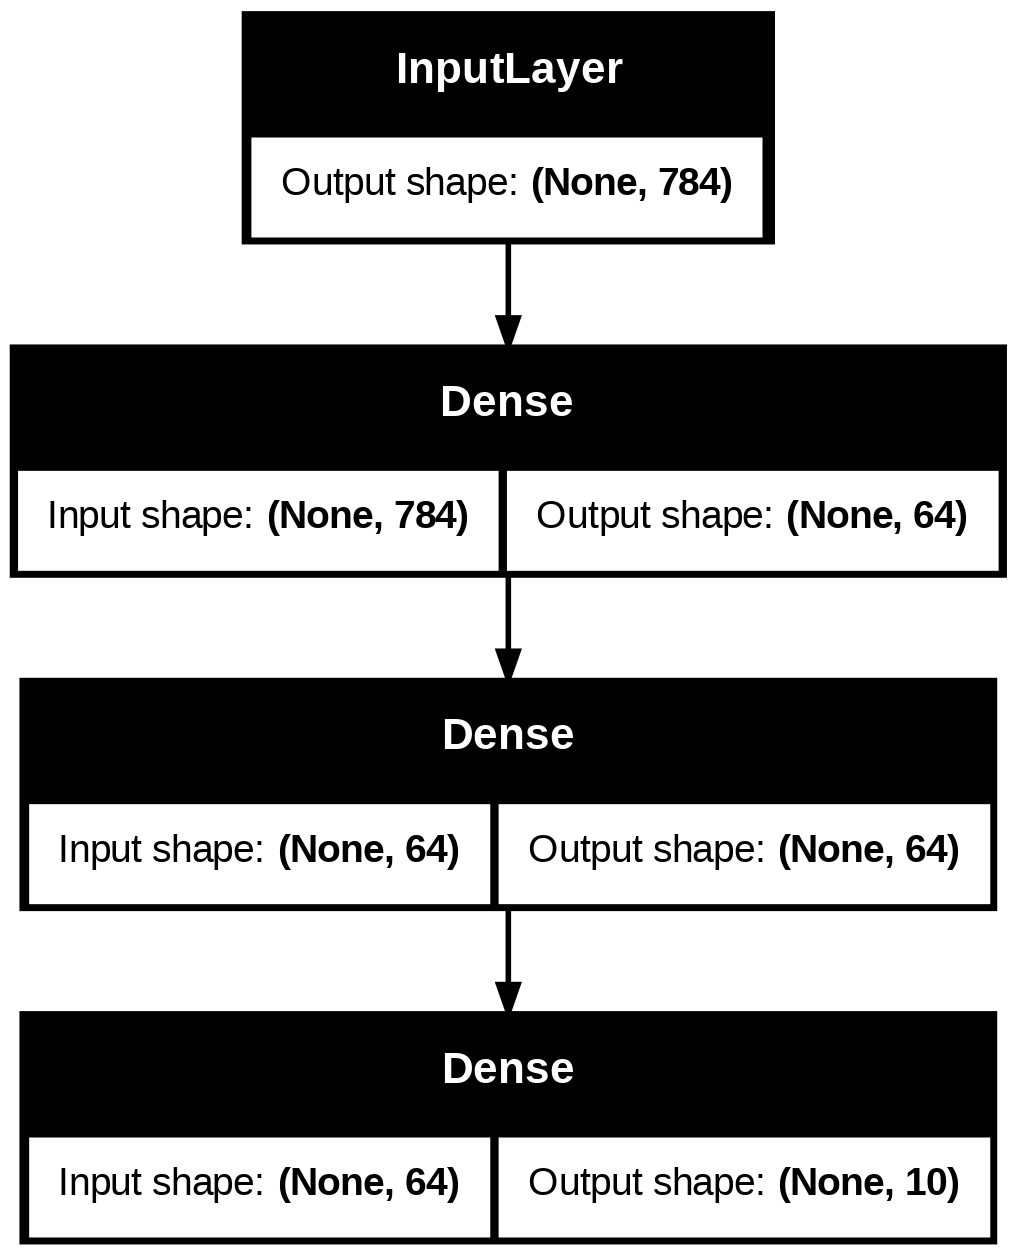

In [5]:
keras.utils.plot_model(model, "feedforward_model_with_shape_info.png", show_shapes=True)

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9041 - loss: 0.3366 - val_accuracy: 0.9498 - val_loss: 0.1807
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9527 - loss: 0.1554 - val_accuracy: 0.9585 - val_loss: 0.1384
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1136 - val_accuracy: 0.9622 - val_loss: 0.1259
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0902 - val_accuracy: 0.9665 - val_loss: 0.1085
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0761 - val_accuracy: 0.9681 - val_loss: 0.1117
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0635 - val_accuracy: 0.9696 - val_loss: 0.1088
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0557 - val_accuracy: 0.9706 - val_loss: 0.0996
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.

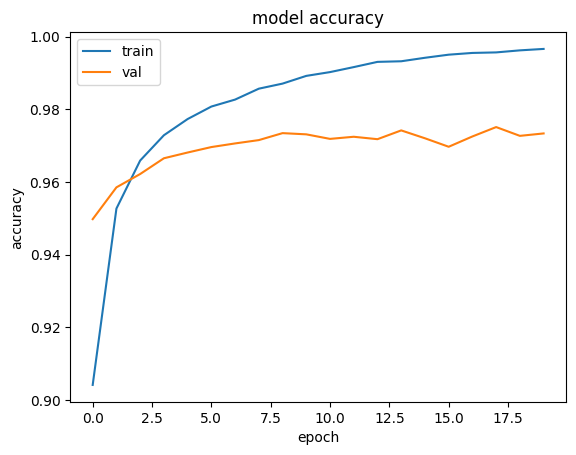

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

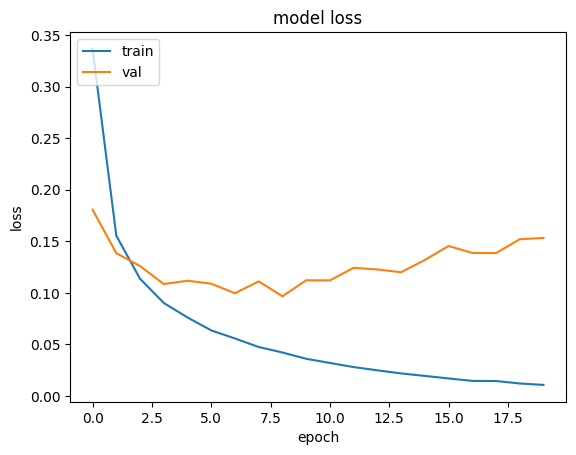

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


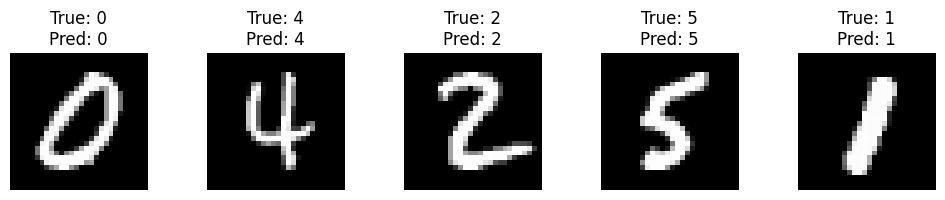

In [9]:
# Select a few random indices from the test set
num_samples = 5
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    img = x_test[idx]
    # If images are flattened, reshape to 28x28
    if img.shape[-1] != 28:
        img = img.reshape(28, 28)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    # Predict label and compare with true label.
    pred = model.predict(np.expand_dims(x_test[idx], axis=0), verbose=0)
    pred_label = np.argmax(pred, axis=1)[0]
    true_label = y_test[idx]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
plt.tight_layout()
plt.show()